In [2]:
# Importación de librerías necesarias
# -----------------------------------------------------------------------

# Tratamiento de datos
import pandas as pd
import numpy as np 
# -----------------------------------------------------------------------

# Imputación de nulos usando métodos avanzados estadísticos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# -----------------------------------------------------------------------

# Visualización y gráficos
import matplotlib.pyplot as plt
import seaborn as sns
# -----------------------------------------------------------------------

# Configuración para visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None)
# -----------------------------------------------------------------------

# Configuración para mejoras de la visualización
from IPython.display import display
# -----------------------------------------------------------------------

# Gestión de warnings
import warnings
warnings.filterwarnings("ignore")
# -----------------------------------------------------------------------

In [3]:
# Importación de DataFrames

df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_val = pd.read_csv("val.csv")

## 1. Exploratory Data Analysis 🫧

### 1.1. **Data Exploration**

In [4]:
df_test.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral


In [5]:
df_train.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [6]:
df_val.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,10,31,Male,Instagram,170,5,80,20,35,Happiness
1,877,32,Female,Instagram,155,6,75,25,38,Happiness
2,230,26,Non-binary,Facebook,45,1,8,4,12,Sadness
3,876,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
4,376,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety


In [7]:
#vemos que los tres dataframes tienen la misma estructura por lo que vamos a unirlos para después continuar con el EDA

df = pd.concat([df_test, df_train, df_val], axis=0)
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120.0,4.0,40.0,18.0,22,Neutral
1,488,21,Non-binary,Snapchat,60.0,1.0,18.0,7.0,12,Neutral
2,776,28,Non-binary,Snapchat,115.0,3.0,38.0,18.0,27,Anxiety
3,869,27,Male,Telegram,105.0,3.0,48.0,20.0,28,Anxiety
4,573,21,Non-binary,Facebook,55.0,3.0,17.0,7.0,12,Neutral


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 0 to 147
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1252 non-null   object 
 1   Age                         1252 non-null   object 
 2   Gender                      1251 non-null   object 
 3   Platform                    1251 non-null   object 
 4   Daily_Usage_Time (minutes)  1251 non-null   float64
 5   Posts_Per_Day               1251 non-null   float64
 6   Likes_Received_Per_Day      1251 non-null   float64
 7   Comments_Received_Per_Day   1251 non-null   float64
 8   Messages_Sent_Per_Day       1251 non-null   object 
 9   Dominant_Emotion            1250 non-null   object 
dtypes: float64(4), object(6)
memory usage: 107.6+ KB


In [9]:
df.shape

(1252, 10)

In [10]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [11]:
#vemos los valores únicos que tiene cada columna
df.nunique().sort_values(ascending=False)

User_ID                       1218
Messages_Sent_Per_Day           59
Likes_Received_Per_Day          56
Daily_Usage_Time (minutes)      35
Comments_Received_Per_Day       31
Gender                          20
Age                             19
Posts_Per_Day                   10
Platform                         8
Dominant_Emotion                 7
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily_Usage_Time (minutes),1251.0,95.283773,39.115094,1.0,65.0,85.0,120.0,210.0
Posts_Per_Day,1251.0,3.314948,1.932027,1.0,2.0,3.0,4.0,10.0
Likes_Received_Per_Day,1251.0,39.300560,26.205419,2.0,19.0,30.0,50.0,110.0
Comments_Received_Per_Day,1251.0,15.403677,8.714454,2.0,8.0,14.0,21.0,40.0


In [13]:
df.duplicated().sum()

11

In [14]:
nulls = df.isnull().sum()
nulls.sort_values(ascending=False)

Dominant_Emotion              2
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
User_ID                       0
Age                           0
dtype: int64

In [15]:
nulls_percentage = nulls/df.shape[0]*100 # transformamos los nulos a porcentajes de nulos

columns_with_nulls = df.columns[df.isnull().any()]
columns_with_nulls

Index(['Gender', 'Platform', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

**Observaciones del EDA:**

- **'User_ID'**: parece que tiene duplicados. El df tiene en total 1252 filas pero sólo hay 1218 IDs únicos. El tipo de dato tendría que ser int, no object.
- (CRIS)**'Age'**: el tipo de dato debería de ser int. Revisar los valores únicos.
- (CRIS)**'Gender'**: tiene nulos y hay que revisar los valores únicos.
- (CRIS)**'Platform'**: tiene nulos
- (ELISA)**'Daily_Usage_Time (minutes)'**: tiene nulos, revisar tipo de dato (int o float?)
- (ELISA)**'Posts_Per_Day'**: tiene nulos, revisar tipo de dato (int o float?)
- (ELISA)**'Likes_Received_Per_Day'**:tiene nulos, revisar tipo de dato (int o float?)
- (JESSICA)**'Comments_Received_Per_Day'**: tiene nulos, revisar tipo de dato (int o float?)
- (JESSICA)**'Messages_Sent_Per_Day'**: tiene nulos, el tipo de dato debería ser int o float, no object
- (JESSICA)**'Dominant_Emotion'**: tiene nulos


### 1.2. **Data Cleaning**

#### **Nulls Management**

#### Para la gestión de nulos vamos a separar las variables entre categóricas y numéricas.

### NUMERICAL

In [16]:
numerical_with_nulls = df[df.columns[df.isnull().any()]].select_dtypes(include = "number").columns
numerical_with_nulls

Index(['Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day',
       'Comments_Received_Per_Day'],
      dtype='object')

El porcentaje de nulos de DAILY_USAGE_TIME (MINUTES) es 0.08.


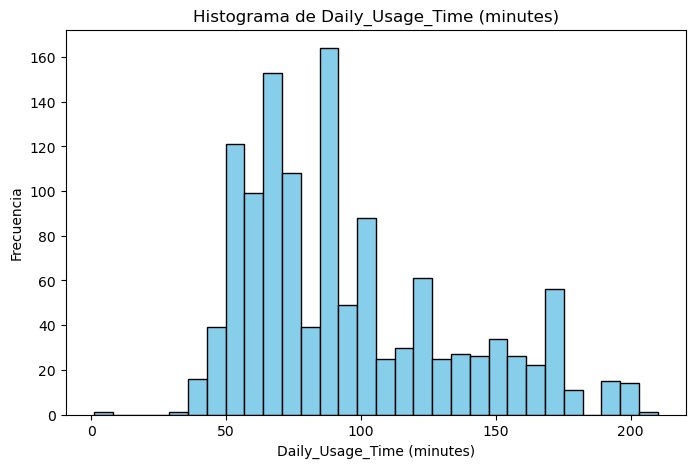

El porcentaje de nulos de POSTS_PER_DAY es 0.08.


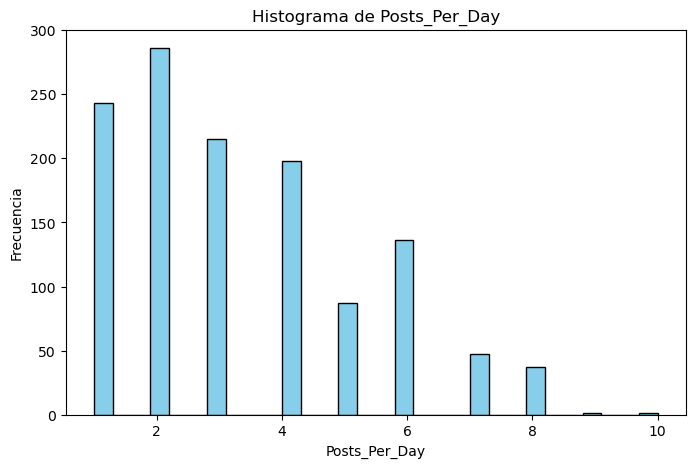

El porcentaje de nulos de LIKES_RECEIVED_PER_DAY es 0.08.


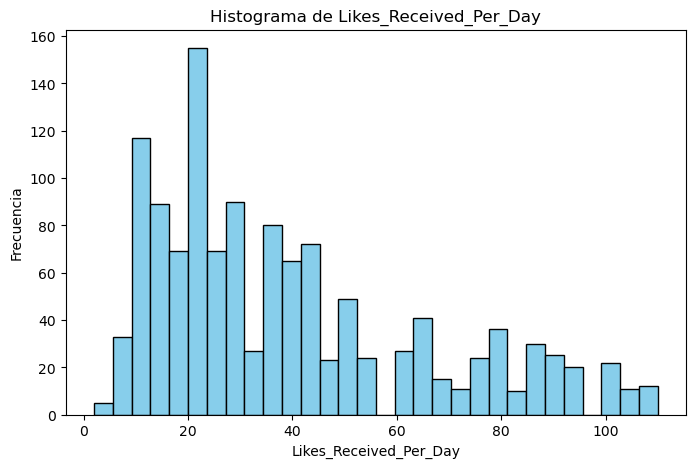

El porcentaje de nulos de COMMENTS_RECEIVED_PER_DAY es 0.08.


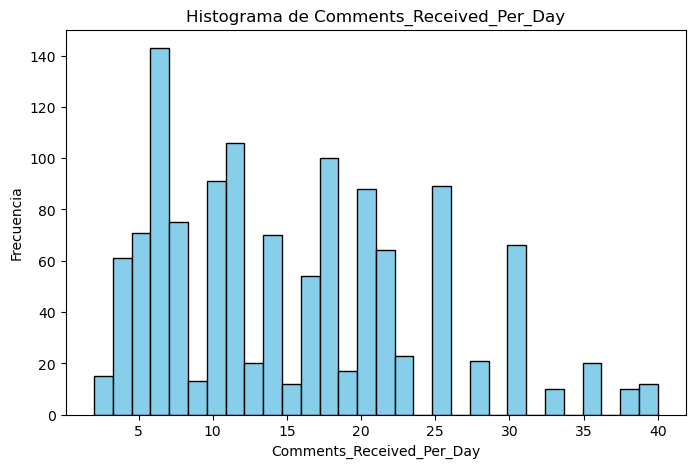

In [17]:
for col in list(numerical_with_nulls):
    print(f'El porcentaje de nulos de {col.upper()} es {np.round((nulls_percentage[col]), 2)}.')
    plt.figure(figsize=(8, 5))
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

#### Observaciones:

- **'Daily_Usage_Time (minutes)'**: bajo % de nulos + distribución no simétrica -> imputación con la mediana. 
- **'Posts_Per_Day'**: bajo % de nulos + distribución no simétrica -> imputación con la mediana. 
- **'Likes_Received_Per_Day'**: bajo % de nulos + distribución no simétrica -> imputación con la mediana. 

In [18]:
#sustituimos nulos por la mediana

df['Daily_Usage_Time (minutes)'] = df['Daily_Usage_Time (minutes)'].fillna(df['Daily_Usage_Time (minutes)'].median())
df['Posts_Per_Day'] = df['Posts_Per_Day'].fillna(df['Posts_Per_Day'].median())
df['Likes_Received_Per_Day'] = df['Likes_Received_Per_Day'].fillna(df['Likes_Received_Per_Day'].median())


### **Age** 🔞

In [19]:
#la columna Age no tiene nulos inicialmente, pero sí tiene valores atípicos por lo que vamos a tratarlos aquí 
df["Age"].unique()

array(['27', '21', '28', '25', '24', '33', '32', '23', '35', '31', '34',
       '29', '22', '26', '30', 'Male', 'Female', 'Non-binary',
       ' işte mevcut veri kümesini 1000 satıra tamamlıyorum:'],
      dtype=object)

In [20]:
# Tenemos 4 datos no numericos, vamos a llenarlos con nulos para tratarlos
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

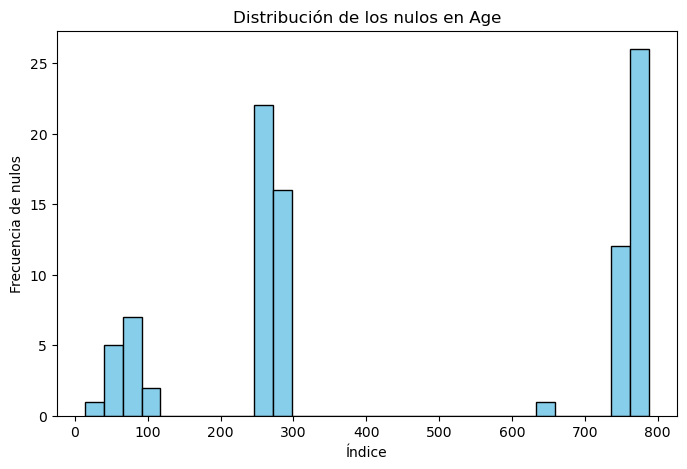

In [21]:
# Filtrar los valores nulos en la columna Age
df_null = df[df["Age"].isnull()]

# Crear histograma de los valores nulos (en este caso, contar cuántos hay por índice)
plt.figure(figsize=(8, 5))
plt.hist(df_null.index, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de los nulos en Age')
plt.xlabel('Índice')
plt.ylabel('Frecuencia de nulos')
plt.show()

In [22]:
columna = "Age"  # Nombre de la columna a analizar

# Verificar si la columna existe y tiene valores nulos
if columna in df.columns and df[columna].isnull().any():
    print(f"La distribución de las categorías (incluyendo nulos 🏴) para la columna '{columna}':")
    display(df[columna].value_counts(dropna=False, normalize=True) * 100)
    print("........................")
else:
    print(f"La columna '{columna}' no existe, no tiene nulos o no es de tipo texto (object).")

La distribución de las categorías (incluyendo nulos 🏴) para la columna 'Age':


Age
28.0    9.584665
27.0    9.265176
29.0    8.865815
NaN     7.348243
26.0    7.028754
22.0    6.869010
24.0    6.709265
31.0    6.549521
25.0    6.309904
21.0    5.511182
23.0    5.431310
33.0    5.351438
30.0    4.233227
32.0    3.753994
35.0    3.674121
34.0    3.514377
Name: proportion, dtype: float64

........................


In [23]:
# En edad tenemos un bajo % de nulos, un 7,35%. Vamos a llenar con la mediana
df['Age'].fillna(df['Age'].median(), inplace=True)

### **Comments_Received_Per_Day**

In [24]:
# Contar el número de valores nulos en la columna 'Comments_Received_Per_Day'
nulos = df["Comments_Received_Per_Day"].isnull().sum()

print(f"El número de valores nulos en 'Comments_Received_Per_Day' es: {nulos}")


El número de valores nulos en 'Comments_Received_Per_Day' es: 1


In [25]:
df["Comments_Received_Per_Day"].unique()

array([18.,  7., 20., 26.,  5., 22., 12., 28.,  8., 10.,  6., 13., 14.,
       30.,  4., 25., 16., 15., 11.,  2., 33.,  9., 40., 19., 23.,  3.,
       17., 35., 38., 36., nan, 21.])

In [26]:
df["Comments_Received_Per_Day"].value_counts(dropna=False)

Comments_Received_Per_Day
18.0    100
10.0     91
20.0     88
7.0      81
12.0     77
8.0      75
5.0      71
14.0     70
30.0     66
25.0     63
6.0      62
4.0      61
22.0     59
16.0     44
11.0     29
26.0     26
23.0     23
28.0     21
13.0     20
19.0     17
9.0      13
40.0     12
15.0     12
2.0      11
33.0     10
17.0     10
35.0     10
38.0     10
36.0     10
21.0      5
3.0       4
NaN       1
Name: count, dtype: int64

In [27]:
# Sustituir el nulo con la mediana de la columna
df["Comments_Received_Per_Day"] = df["Comments_Received_Per_Day"].fillna(df["Comments_Received_Per_Day"].median())


In [28]:
#Cambiamos el tipo de dato a int
df["Comments_Received_Per_Day"] = df["Comments_Received_Per_Day"].astype(int)

### CATEGORICAL

In [29]:
categorical_with_nulls = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
categorical_with_nulls

Index(['Gender', 'Platform', 'Messages_Sent_Per_Day', 'Dominant_Emotion'], dtype='object')

In [30]:
for col in categorical_with_nulls:
    print(f"La distribución de las categorías (incluyendo nulos) para la columna", col.upper())
    display(df[col].value_counts(dropna=False, normalize=True) * 100)  # Convertimos a porcentaje
    print("........................")

La distribución de las categorías (incluyendo nulos) para la columna GENDER


Gender
Female        33.306709
Male          32.827476
Non-binary    26.437700
29             0.798722
28             0.798722
27             0.718850
24             0.718850
31             0.638978
22             0.638978
34             0.479233
25             0.479233
33             0.479233
26             0.399361
21             0.319489
30             0.239617
23             0.159744
35             0.159744
32             0.159744
Marie          0.079872
NaN            0.079872
Facebook       0.079872
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna PLATFORM


Platform
Instagram    24.281150
Facebook     19.888179
Twitter      19.488818
LinkedIn     12.300319
Snapchat      8.945687
Telegram      7.827476
Whatsapp      7.108626
NaN           0.079872
55            0.079872
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna MESSAGES_SENT_PER_DAY


Messages_Sent_Per_Day
20         9.904153
18         9.345048
25         7.827476
12         7.268371
22         7.028754
30         6.709265
10         5.591054
28         5.031949
15         4.233227
35         2.635783
38         2.396166
14.0       2.396166
24         2.316294
33         1.837061
11         1.837061
26         1.757188
45         1.597444
12         1.118211
27         1.118211
20         1.118211
17         1.038339
31         0.958466
21         0.958466
40.0       0.878594
50.0       0.798722
23         0.798722
19.0       0.798722
22         0.798722
25         0.798722
29         0.798722
30         0.798722
15         0.718850
10         0.718850
28         0.638978
18         0.559105
35         0.479233
27         0.479233
14         0.319489
11         0.319489
45         0.319489
21         0.319489
40         0.239617
23         0.239617
24         0.239617
32         0.239617
29         0.239617
26         0.159744
38         0.159744
17         0.15974

........................
La distribución de las categorías (incluyendo nulos) para la columna DOMINANT_EMOTION


Dominant_Emotion
Neutral      20.607029
Happiness    19.329073
Anxiety      17.811502
Sadness      15.894569
Boredom      13.897764
Anger        12.220447
NaN           0.159744
Agression     0.079872
Name: proportion, dtype: float64

........................


### **Gender** 🚻

In [31]:
df["Gender"].unique()

array(['Female', 'Non-binary', 'Male', '27', 'Marie', '24', '29', '33',
       '31', '22', '25', '28', '30', '23', '34', '26', '35', '21', '32',
       nan, 'Facebook'], dtype=object)

In [32]:
df["Gender"] = df["Gender"].replace(["Marie", "Facebook"], np.nan)


In [33]:
df["Gender"] = df["Gender"].mask(pd.to_numeric(df["Gender"], errors='coerce').notna(), np.nan)

In [34]:
df["Gender"].unique()

array(['Female', 'Non-binary', 'Male', nan], dtype=object)

In [35]:
columna = "Gender"  # Nombre de la columna a analizar

# Verificar si la columna existe y tiene valores nulos
if columna in df.columns and df[columna].isnull().any():
    print(f"La distribución de las categorías (incluyendo nulos 🏴) para la columna '{columna}':")
    display(df[columna].value_counts(dropna=False, normalize=True) * 100)
    print("........................")
else:
    print(f"La columna '{columna}' no existe, no tiene nulos o no es de tipo texto (object).")


La distribución de las categorías (incluyendo nulos 🏴) para la columna 'Gender':


Gender
Female        33.306709
Male          32.827476
Non-binary    26.437700
NaN            7.428115
Name: proportion, dtype: float64

........................


In [36]:
#representa un 7,43% y no hay ninguna categoría dominante, creamos nueva categoria
df['Gender'] = df['Gender'].fillna('Unknown')
print(df['Gender'].isnull().sum())

0


### **Platform** 📳

In [37]:
df["Platform"].unique()

array(['Snapchat', 'Telegram', 'Facebook', 'Instagram', 'LinkedIn',
       'Twitter', 'Whatsapp', nan, '55'], dtype=object)

In [38]:
# Pasar numericos a nulos
df["Platform"] = df["Platform"].mask(pd.to_numeric(df["Platform"], errors='coerce').notna(), np.nan)

In [39]:
columna = "Platform"  # Nombre de la columna a analizar

# Verificar si la columna existe y tiene valores nulos
if columna in df.columns and df[columna].isnull().any():
    print(f"La distribución de las categorías (incluyendo nulos 🏴) para la columna '{columna}':")
    display(df[columna].value_counts(dropna=False, normalize=True) * 100)
    print("........................")
else:
    print(f"La columna '{columna}' no existe, no tiene nulos o no es de tipo texto (object).")


La distribución de las categorías (incluyendo nulos 🏴) para la columna 'Platform':


Platform
Instagram    24.281150
Facebook     19.888179
Twitter      19.488818
LinkedIn     12.300319
Snapchat      8.945687
Telegram      7.827476
Whatsapp      7.108626
NaN           0.159744
Name: proportion, dtype: float64

........................


In [40]:
# Tenemos un bajo % de nulos, menos de un 1%. 
# Como hay una categoria dominante, llenamos con la moda
df['Platform'].fillna(df['Platform'].mode()[0], inplace=True)

In [41]:
# ya no tiene nulos
df["Platform"].unique()

array(['Snapchat', 'Telegram', 'Facebook', 'Instagram', 'LinkedIn',
       'Twitter', 'Whatsapp'], dtype=object)

In [42]:
print(df['Platform'].isnull().sum())

0


### **Messages_Sent_Per_Day**

In [43]:
# Contar el número de valores nulos en la columna 
nulos = df["Messages_Sent_Per_Day"].isnull().sum()

print(f"El número de valores nulos en 'Messages_Sent_Per_Day' es: {nulos}")


El número de valores nulos en 'Messages_Sent_Per_Day' es: 1


In [44]:
df["Messages_Sent_Per_Day"].unique()

array([22, 12, 27, 28, 30, 18, 33, 10, 17, 15, 35, 20, 25, 11, 26, 29, 38,
       31, 21, 23, 45, 24, 50.0, 8.0, 40.0, 32.0, 14.0, 9.0, 19.0, nan,
       '35', '38', '12', '27', '10', '32', '22', '26', '30', '19', '17',
       '25', '20', '29', '28', '40', '15', '18', '14', '21', '24', '45',
       '13', '34', '31', '23', '11', 'Anxiety', '50', '39'], dtype=object)

In [45]:
df["Messages_Sent_Per_Day"] = pd.to_numeric(df["Messages_Sent_Per_Day"], errors="coerce")


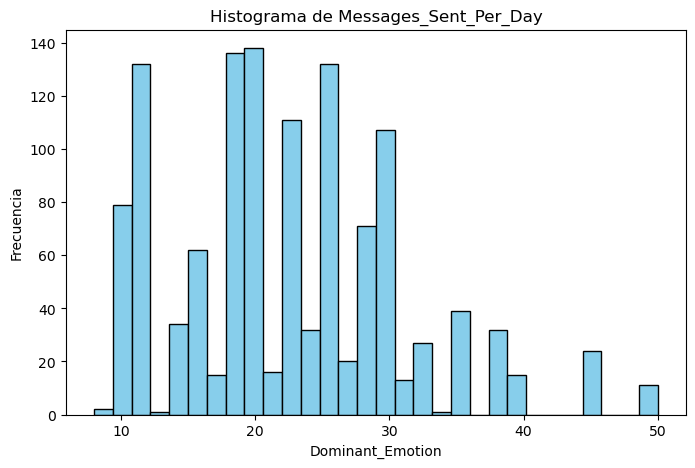

In [46]:
#Ver histograma

plt.figure(figsize=(8, 5))
plt.hist(df["Messages_Sent_Per_Day"].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title(f'Histograma de {"Messages_Sent_Per_Day"}')
plt.xlabel(col)
plt.ylabel('Frecuencia')
plt.show()

In [47]:
  # Rellenar los 2 nulos con la mediana y convertir a tipo de dato int
df["Messages_Sent_Per_Day"] = df["Messages_Sent_Per_Day"].fillna(df["Messages_Sent_Per_Day"].median())
df["Messages_Sent_Per_Day"] = df["Messages_Sent_Per_Day"].astype(int)


### **Dominant_Emotion**

In [48]:
df["Dominant_Emotion"].isnull().sum()

2

In [49]:
df["Dominant_Emotion"].unique()

array(['Neutral', 'Anxiety', 'Happiness', 'Boredom', 'Sadness', 'Anger',
       nan, 'Agression'], dtype=object)

In [50]:
df["Dominant_Emotion"].value_counts()

Dominant_Emotion
Neutral      258
Happiness    242
Anxiety      223
Sadness      199
Boredom      174
Anger        153
Agression      1
Name: count, dtype: int64

In [51]:
# Tratar los nulo con la categoría dominante más frecuente
df["Dominant_Emotion"] = df["Dominant_Emotion"].fillna(df["Dominant_Emotion"].mode()[0])


##### *Comprobamos que ya no quedan columnas con nulos*

In [52]:
#comprobar al final
df.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

#### **Atypical Values, Data Types and Normalization**

In [53]:
# una vez gestionados los nulos, modificamos los tipos de datos a enteros para simplificar el análisis

df['Age'] = df['Age'].astype(int)
df['Daily_Usage_Time (minutes)'] = df['Daily_Usage_Time (minutes)'].astype(int)
df['Posts_Per_Day'] = df['Posts_Per_Day'].astype(int)
df['Likes_Received_Per_Day'] = df['Likes_Received_Per_Day'].astype(int)

#Comments_Received_Per_Day y Messages_Sent_Per_day ya estan cambiados a INT

In [54]:
df.dtypes

User_ID                       object
Age                            int32
Gender                        object
Platform                      object
Daily_Usage_Time (minutes)     int32
Posts_Per_Day                  int32
Likes_Received_Per_Day         int32
Comments_Received_Per_Day      int32
Messages_Sent_Per_Day          int32
Dominant_Emotion              object
dtype: object

In [55]:
# DECIDIR JUNTAS SI CAMBIAMOS EL FORMATO DE LOS NOMBRES DE LAS COLUMNAS

#### **Duplicates Management** -> PENDIENTE VER CUANDO YA NO HAYA NULOS!

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 0 to 147
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     1252 non-null   object
 1   Age                         1252 non-null   int32 
 2   Gender                      1252 non-null   object
 3   Platform                    1252 non-null   object
 4   Daily_Usage_Time (minutes)  1252 non-null   int32 
 5   Posts_Per_Day               1252 non-null   int32 
 6   Likes_Received_Per_Day      1252 non-null   int32 
 7   Comments_Received_Per_Day   1252 non-null   int32 
 8   Messages_Sent_Per_Day       1252 non-null   int32 
 9   Dominant_Emotion            1252 non-null   object
dtypes: int32(6), object(4)
memory usage: 78.2+ KB


In [57]:
duplicates= df[df.duplicated()].sort_values(by="User_ID")
duplicates


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
102,60,27,Male,Facebook,60,1,10,4,15,Boredom
24,100,27,Female,Snapchat,120,4,38,13,22,Neutral
84,119,23,Non-binary,LinkedIn,50,1,12,6,12,Neutral
133,185,29,Non-binary,Facebook,75,2,20,8,20,Boredom
25,211,23,Female,Twitter,75,4,45,20,25,Anxiety
102,211,23,Female,Twitter,75,4,45,20,25,Anxiety
116,227,27,Non-binary,LinkedIn,55,1,9,2,11,Anxiety
92,343,29,Male,Twitter,95,4,50,22,22,Anger
16,371,24,Female,Instagram,140,4,65,22,30,Happiness
90,372,35,Male,Twitter,70,1,13,8,10,Boredom


In [58]:
df.shape

(1252, 10)

In [59]:
# Eliminar solo las duplicadas, manteniendo la primera aparición
df = df.drop_duplicates(keep='first')


In [60]:
df.shape

(1230, 10)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1230 entries, 0 to 147
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     1230 non-null   object
 1   Age                         1230 non-null   int32 
 2   Gender                      1230 non-null   object
 3   Platform                    1230 non-null   object
 4   Daily_Usage_Time (minutes)  1230 non-null   int32 
 5   Posts_Per_Day               1230 non-null   int32 
 6   Likes_Received_Per_Day      1230 non-null   int32 
 7   Comments_Received_Per_Day   1230 non-null   int32 
 8   Messages_Sent_Per_Day       1230 non-null   int32 
 9   Dominant_Emotion            1230 non-null   object
dtypes: int32(6), object(4)
memory usage: 76.9+ KB


##### *Comprobamos que ya no quedan entradas duplicadas*

In [62]:
df.duplicated().sum()

0

In [69]:
df['User_ID'].value_counts()

User_ID
185    2
733    2
275    2
810    2
986    2
      ..
312    1
311    1
310    1
309    1
493    1
Name: count, Length: 1218, dtype: int64

In [67]:
df['User_ID'].duplicated().sum()

12

In [64]:
# Cambiar nombres de columnas
df = df.rename(columns={
    "Daily_Usage_Time (minutes)" : "Dayli_usage_time",
    "Posts_Per_Day": "Post_per_day",
    "Likes_Received_Per_Day" : "Likes_received_per_day",
    "Comments_Received_Per_Day" : "Comments_received_per_day",
    "Messages_Sent_Per_Day" : "Messages_sent_per_day",
    "Dominant_Emotion": "Dominant_emotion"
})


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1230 entries, 0 to 147
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   User_ID                    1230 non-null   object
 1   Age                        1230 non-null   int32 
 2   Gender                     1230 non-null   object
 3   Platform                   1230 non-null   object
 4   Dayli_usage_time           1230 non-null   int32 
 5   Post_per_day               1230 non-null   int32 
 6   Likes_received_per_day     1230 non-null   int32 
 7   Comments_received_per_day  1230 non-null   int32 
 8   Messages_sent_per_day      1230 non-null   int32 
 9   Dominant_emotion           1230 non-null   object
dtypes: int32(6), object(4)
memory usage: 76.9+ KB


In [66]:
df.to_csv('df_socialmedia.csv', index=False)
